<a href="https://colab.research.google.com/github/samikris/AAS224-advancedtiming/blob/main/REYES_P4P_P6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6: Electromagnetic Waves and Fourier Transforms

### Edited: Joseph Slivka and Ivan Burbano

In [ ]:
! apt-get install git
!git clone https://github.com/samikris/Physics-Projects.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fatal: destination path 'Physics-Projects' already exists and is not an empty directory.


# Predefined functions

Recommend annotating functions using these conventions for documentation following the description, params, and return convention. Example: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

"""
"""

"first, let's define some basic functions"
pi= np.pi
def sqrt(x): return np.sqrt(x)
def exp(x): return np.exp(x)
def sin(x): return np.sin(x)
def cos(x): return np.cos(x)
def log(x): return np.log(x)
def poly0(x): return (pow(x,3)/6.) + (pow(x,4)/8.0)

In [ ]:
"""
*****************************
*****************************
  Electric field
*****************************
*****************************
"""

def E_field(E0, x,t,f):
	"I am setting c =1 "
	c=1
	lamd = c/f

	darg0 = 2 * pi * x / lamd
	darg1 = - 2 * pi * f * t

	return E0 * cos(darg0 + darg1)

def dE(E0, x,t,f, var):

	"the numerator"
	if var =='t':
		num = E_field(E0, x,t+a,f) - E_field(E0, x,t-a ,f)
	elif var =='x':
		num = E_field(E0, x+a,t,f) - E_field(E0, x-a,t ,f)

	"the denominator"
	denum = 2.0 * a

	return num / denum

def dE2(E0, x,t,f, var1, var2):

	"the numerator"
	if var2 =='t':
		num = dE(E0, x,t+a,f,var1) - dE(E0, x,t-a ,f,var1)
	elif var2 =='x':
		num = dE(E0, x+a,t,f,var1) - dE(E0, x-a,t ,f,var1)

	"the denominator"
	denum = 2.0 * a

	return num / denum


def test_wave_Eq(E0, x,t,f):

	"derivative with respect to x"

	dEtt = dE2(E0, x,t,f, 't', 't')
	dExx = dE2(E0, x,t,f, 'x', 'x')

	return dExx - dEtt


# Exercise 1: Checking the wave equation for electric fields

How do computers check for solutions of a differential equation, whether analytically solvable or not?

NameError: name 'E_field' is not defined

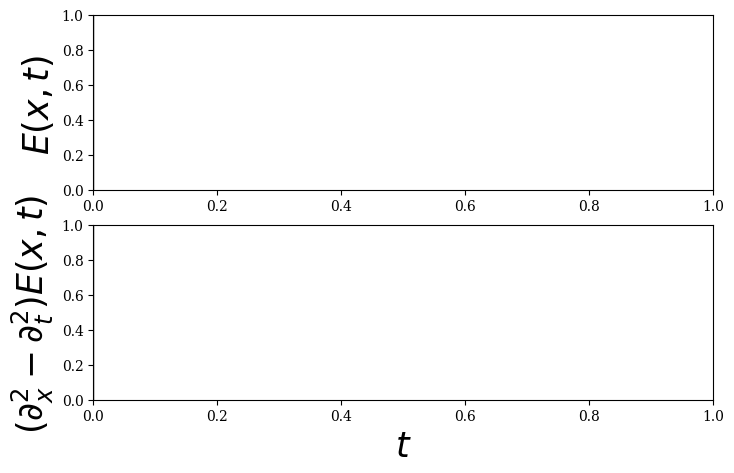

In [ ]:
"""
*****************************
*****************************
  Electric plots
	In essence, the code:

Models an electric field as a wave.
Calculates its derivatives to test if it behaves according to the wave equation.
Plots the results to visually confirm whether the electric field satisfies the wave equation.
This process is useful in physics to verify that a given wave (in this case, the electric field) behaves as expected under the wave equation,
which is a fundamental principle for wave propagation in various physical contexts, including light waves and electromagnetic fields.
*****************************
*****************************
"""


ts = np.arange(0,2,.01)

x = 0
a = pow(10,-3)

# Define what parameters to plot
E0s = [1, 2, 3, 4, 5]
fs = [1, 2, 3, 4, 5]
# and choose pretty colors
colors = ['r','orange','green','blue','magenta']

plt.figure(figsize=(8,5))
plt.subplot(211)
plt.axvline(x=0,color='k',linewidth=1)
plt.ylabel(r'$E(x,t)$ ',size=25)
plt.subplot(212)
plt.ylabel(r'$(\partial_x^2 - \partial_t^2 )E(x,t)$ ',size=25)
plt.xlabel(r'$t$ ',size=25, position=(1,1.2))
plt.axvline(x=0,color='k',linewidth=1)

for j0 in range(len(E0s)): # loop through E0s and frequencies (should be same length)
	# choose specific amplitude and frequency
	E0 = E0s[0]
	f = fs[0]
	colorf = colors[j0]

	# y1 should plot the Electric field equation using E_field from predefined function
	y1 = [E_field(E0, x, t, f) for t in ts]
	# y2 should check that it satisfied the wave equation from predefined function
	y2 = [test_wave_Eq(E0, x, t, f) for t in ts]

	plt.subplot(211)
	plt.xticks(fontsize=15)
	plt.yticks(fontsize=15)
	plt.axhline(y=0,color='k',linewidth=1)

	# plot E(x,t)
	plt.plot() # look at subplot 2 if this seems confusing
	plt.ylim([-2.1,2.1])

	plt.subplot(212)
	plt.xticks(fontsize=15)
	plt.yticks(fontsize=15)

	plt.axhline(y=0,color='k',linewidth=1)
	plt.axvline(x=0,color='k',linewidth=1)

	plt.plot(ts, y2, color=colorf)
	plt.ylim([-.1,.1])




# Exercise 2: Sum of cosines

How does adding cosines together change the form of the wave?

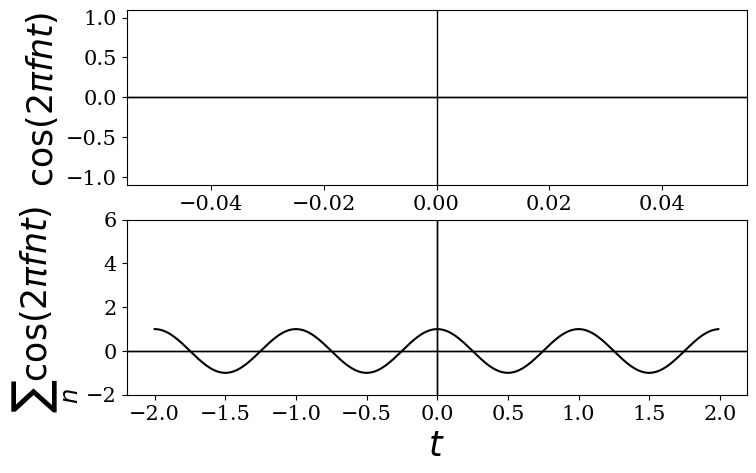

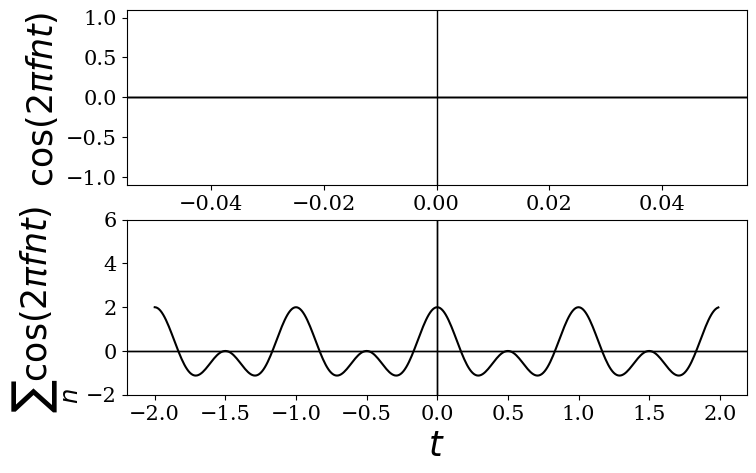

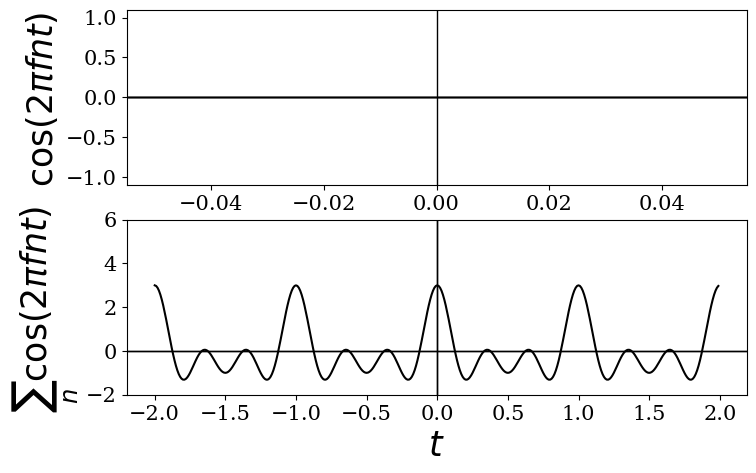

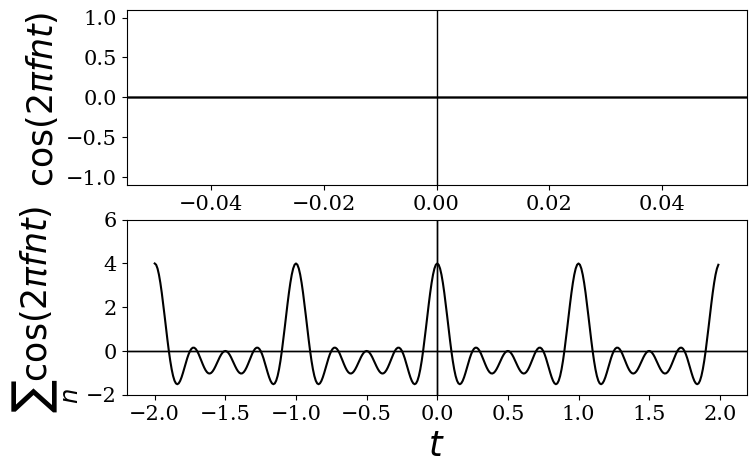

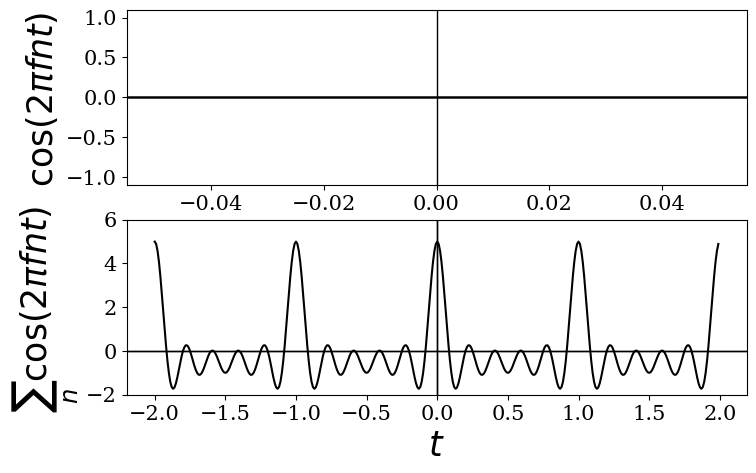

In [ ]:
"""
*****************************
*****************************
  sum of cosines
*****************************
*****************************
"""

ts = np.arange(-2,2,.01)


for k0 in range(1,6):

	plt.figure(figsize=(8,5))

	colors = ['r','orange','y','green','blue','magenta']
	fs = np.arange(1, k0 + 1) # make array of frequencies from 1,2,...,k0

	plt.subplot(211)
	plt.axvline(x=0,color='k',linewidth=1)
	plt.axhline(y=0,color='k',linewidth=1)
	plt.ylabel(r'$ \cos(2\pi f n t ) $ ',size=25)

	plt.subplot(212)
	plt.ylabel(r'$\sum_n \cos(2\pi f n t )$ ',size=25)
	plt.axvline(x=0,color='k',linewidth=1)
	plt.axhline(y=0,color='k',linewidth=1)

	plt.xlabel(r'$t$',size=25, position=(1,1.2))

	ysum = np.zeros_like(ts)# initialize array of zeros to store values of ysum, should be same dimension as ts

	for j0 in range(len(fs)):

		f = fs[j0]
		colorf = colors[j0]

		y1 = np.cos(2*np.pi*f*ts) # calculate new component of ysum the function calculates the corresponding cosine wave y1 using the formula y1=cos(2πft).
		ysum += y1 # update ysum

		plt.subplot(211)
		plt.xticks(fontsize=15)
		plt.yticks(fontsize=15)
		plt.axhline(y=0,color='k',linewidth=1)

		plt.plot() # plot each line, use color code
		plt.ylim([-1.1,1.1])

	plt.subplot(212)
	plt.xticks(fontsize=15)
	plt.yticks(fontsize=15)
	plt.ylim([-2.,6])

	plt.axhline(y=0,color='k',linewidth=1)
	plt.axvline(x=0,color='k',linewidth=1)
	plt.plot(ts, ysum, color='black')

	# plt.savefig('cos_sum_'+str(len(fs)),
	# 	bbox_inches='tight',
	# 	transparent=True)

# Exercise 3: Converting integers to different bases

How do you represent one trillion in hexadecimal notation?

In [ ]:
"""
*****************************
*****************************
  converting decimal to other bases with a-z as numbers 10-35
*****************************
*****************************
"""

def base_converter(num, base):

  if num == 0:
    return '0'

  digits = []

  while num > 0 : # determine appropriate false condition
    remainder = num % base # calculate remainder dividing by base
    if remainder < 10:
      digits.append(chr(remainder + 48))  # Convert to ASCII character ('0'-'9')
    else:
      digits.append(chr(remainder + 87))  # Convert to ASCII character ('a'-'z') for higher decimals
    num = num//base # update number divided by base

  return ''.join(digits[::-1])

decimal_number = 255
base = 2
base_converter(decimal_number, base)

'11111111'

# Exercise 4: Products of cosines, proof of orthogonality

When is the integral over a wave period nonzero?

sum(y1) 100.00998875756515
n 1
sum(y1) 0.009971913367830517
n 2
sum(y1) 0.009943879436555437
n 3
sum(y1) 0.009904715264417309
n 4
sum(y1) 0.009854503931220357
n 5
sum(y1) 0.009793351894881246
n 6
sum(y1) 0.00972138872351716
n 7
sum(y1) 0.009638766769568005
n 8
sum(y1) 0.00954566078661634
n 9
sum(y1) 0.0094422674903342
n 10
sum(y1) 0.009328805064309928
n 11
sum(y1) 0.009205512612522622
n 12
sum(y1) 0.009072649559518559
n 13
sum(y1) 0.008930495000191293
n 14
sum(y1) 0.008779347001409032
n 15
sum(y1) 0.008619521856234947
n 16
sum(y1) 0.008451353293326698
n 17
sum(y1) 0.008275191644625857
n 18
sum(y1) 0.008091402971984473
n 19


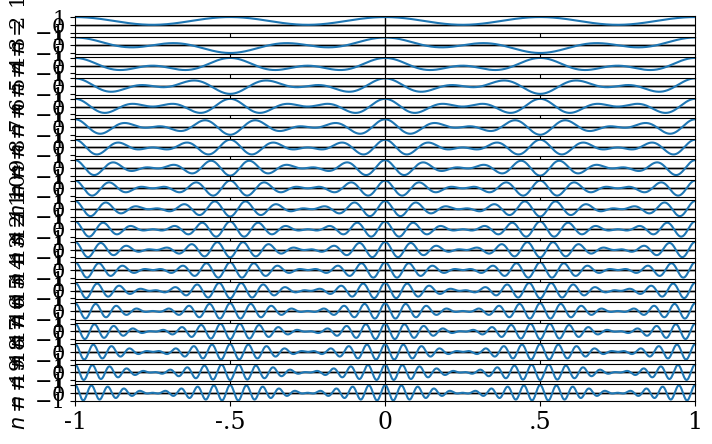

In [ ]:
"""
*****************************
*****************************
  products of cosines
*****************************
*****************************
"""


Lambda = 100.0 # define wavelength
ts = np.arange(-Lambda,Lambda +.01,.001)

plt.figure(figsize=(8,5))

for k0 in range(1,20):

	plt.subplot(19,1,k0)
	plt.axvline(x=0,color='k',linewidth=1)
	plt.axhline(y=0,color='k',linewidth=1)
	plt.ylabel(r'$ n= $ '+ str(k0), size=15) # what n is being plotted

	# calculate cos(2 pi n t) * cos(2 pi t)
	y1 = np.cos(2* np.pi * k0 * ts) * np.cos(2* np.pi * ts)

	print("sum(y1)",sum(y1*(ts[1]-ts[0]))) # a crude sum, maybe you should put in your integrator from last project to check.
	plt.xticks(fontsize=15)
	plt.yticks(fontsize=15)
	plt.axhline(y=0,color='k',linewidth=1)

	plt.plot(ts, y1) # plot it
	plt.ylim([-1.1,1.1])
	print("n",k0) # hint
	plt.xlim([-1,1])
	if k0 != 19 : # only show ticks on bottom subplot
		plt.xticks(np.arange(-1,1.5,.5),['','','','',''],size=17)
	else:
		plt.xticks(np.arange(-1,1.5,.5),['-1','-.5','0','.5','1'],size=17)

# Exercise 5: Plotting a Fourier Series

Text(0, 0.5, 'Imaginary Part')

<Figure size 800x500 with 0 Axes>

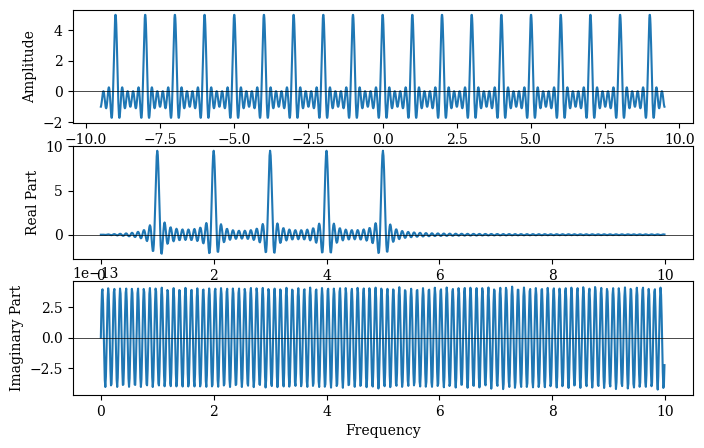

In [ ]:
"""
*****************************
*****************************
  Fourier series...
*****************************
*****************************
"""


Lambda = 9.5
dt = .01
ts = np.arange(-Lambda+(dt/2),Lambda ,dt)

plt.figure(figsize=(8,5))
yt = np.zeros(len(ts))

# Make a sum of cosine waves with integer frequencies 1:5. Use a for loop to make it less typing for you.
for n in range(1, 6):
    yt += np.cos(2 * np.pi * n * ts)

# Plot the actual function in subplot(311). Label your axes and put a horizontal line at x=0 (see above for help)
plt.figure(figsize=(8,5))
plt.subplot(311)
plt.plot(ts, yt)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')


# Look through all frequencies and calculate their integral to see if they contribute to the line equation
fs = np.arange(0,10,.01)
YfR = []
YfI = []
for f0 in fs:
	argR = yt * np.cos(2 * np.pi * f0 * ts) * dt  # do the real integration
	YfR.append( sum(argR) )

	argI = yt * np.sin(2 * np.pi * f0 * ts) * dt # do the imaginary integration --> why is this imaginary??
	YfI.append( sum(argI) )


# Plot the Real component in subplot(312) and Imaginary component in subplot(313).
# Label your axes and put a horizontal line at y=0 and vertical at x=0 (see above for help)
plt.subplot(312)
plt.plot(fs, YfR)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Frequency')
plt.ylabel('Real Part')

plt.subplot(313)
plt.plot(fs, YfI)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Frequency')
plt.ylabel('Imaginary Part')
#Yes, that's exactly right!
#The frequency domain representation of a signal essentially breaks down the original
#function into its constituent frequency components, showing you the "building blocks" that make up the signal.

# Exercise 6: Decoding mystery frequencies using Fourier Transform

In [ ]:
"""
*****************************
*****************************
  decode the frequencies...
*****************************
*****************************
"""


# load FT_mystery.txt. Column 1 is time and column 2 is y. Plot this!




# What are the frequencies used to make this wave? Plot the fourier transform



'\n*****************************\n*****************************\n  decode the frequencies...\n*****************************\n*****************************\n'

# SOUNDDEVICE DEMO FOR CLASS, FEEL FREE TO PLAY WITH!!

Warning this requires sounddevice. Installation can be found here:

https://python-sounddevice.readthedocs.io/en/0.4.1/installation.html

Google collab has trouble playing sounds because it doesn't connect to the local machine appropriately. I was not able to find a workaround. But it worked if I used my local system, say a jupyter notebook, Anaconda, etc.

https://stackoverflow.com/questions/63874548/can-not-import-sounddevice-in-google-colab

Use these commands in line:

!sudo apt-get install libportaudio2
OR
!sudo apt-get install libasound-dev

!pip install sounddevice

In [ ]:
!sudo apt-get install libportaudio2
# !sudo apt-get install libasound-dev
!pip install sounddevice
# !pip install setuptools --user
# !pip install cffi --user

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (212 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 123589 fil

If this can't run using google, copy the code to a local notebook or another python scripting language and try playing locally. Spyder, VS code have been successful.

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
# plt.rc('text', usetex=True)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


# !sudo apt-get install libportaudio2
# # !sudo apt-get install libasound-dev
# !pip install sounddevice
# # !pip install setuptools --user
# # !pip install cffi --user

# Demo code for showing same pitches have different sounds

import sounddevice as sd

"""
# A Regular sine wave tone

# Parameters
frequency = 440  # Frequency of the wave in Hz (A4)
sampling_rate = 44100  # Sampling rate in Hz
duration = 2.0  # Duration of the wave in seconds

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Plane wave (sine wave) calculation
wave = np.sin(2 * np.pi * frequency * t)

# Plotting the wave
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], wave[:1000])  # Plot the first 1000 samples to visualize the wave
plt.title(f'Plane Wave with Frequency {frequency} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Playing the wave
sd.play(wave, sampling_rate)
sd.wait()  # Wait until the sound has finished playing
"""

"""
### Example 2: A Sawtooth Wave

from scipy.signal import sawtooth

# Parameters
frequency = 440  # Frequency of the wave in Hz (A4)
sampling_rate = 44100  # Sampling rate in Hz
duration = 2.0  # Duration of the wave in seconds

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sawtooth wave calculation
wave = sawtooth(2 * np.pi * frequency * t)

# Plotting the wave
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], wave[:1000])  # Plot the first 1000 samples to visualize the wave
plt.title(f'Sawtooth Wave with Frequency {frequency} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Playing the wave
sd.play(wave, sampling_rate)
sd.wait()  # Wait until the sound has finished playing

"""


"""

### Example 3: Piano!!!

# Parameters
frequency = 440  # Frequency of the wave in Hz (A4)
sampling_rate = 44100  # Sampling rate in Hz
duration = 2.0  # Duration of the wave in seconds

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Approximate piano waveform (sum of sine waves with different harmonics)
wave = (np.sin(2 * np.pi * frequency * t) +
        0.5 * np.sin(2 * np.pi * 2 * frequency * t) +
        0.25 * np.sin(2 * np.pi * 3 * frequency * t)) * np.exp(-3 * t)

# Plotting the wave
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], wave[:1000])  # Plot the first 1000 samples to visualize the wave
plt.title(f'Approximate Piano Waveform with Frequency {frequency} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Playing the wave
sd.play(wave, sampling_rate)
sd.wait()  # Wait until the sound has finished playing

"""



"""
### Example 4: Synthesizer...getting techno

# Parameters
frequency = 440  # Frequency of the wave in Hz (A4)
sampling_rate = 44100  # Sampling rate in Hz
duration = 2.0  # Duration of the wave in seconds

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Approximate distorted guitar waveform (sum of sine waves with different harmonics)
wave = (np.sin(2 * np.pi * frequency * t) +
        0.6 * np.sin(2 * np.pi * 2 * frequency * t) +
        0.3 * np.sin(2 * np.pi * 3 * frequency * t) +
        0.2 * np.sin(2 * np.pi * 4 * frequency * t))

# Apply distortion
distortion_factor = 3
distorted_wave = np.tanh(distortion_factor * wave)

# Apply an exponential decay envelope
envelope = np.exp(-3 * t)
distorted_wave = distorted_wave * envelope

# Plotting the wave
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], distorted_wave[:1000])  # Plot the first 1000 samples to visualize the wave
plt.title(f'Distorted Guitar Waveform with Frequency {frequency} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Playing the wave
sd.play(distorted_wave, sampling_rate)
sd.wait()  # Wait until the sound has finished playing
"""


"""

### Make a chord?

# Parameters
frequency = 440  # Frequency of the wave in Hz (A4)
frequency2 = 523.251  # C5
frequency3 = 659.25  # E5
sampling_rate = 44100  # Sampling rate in Hz
duration = 2.0  # Duration of the wave in seconds

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Approximate dpiano waveform (sum of sine waves with different harmonics)
wave = (np.sin(2 * np.pi * frequency * t) +
        0.6 * np.sin(2 * np.pi * 2 * frequency * t) +
        0.3 * np.sin(2 * np.pi * 3 * frequency * t) +
        0.2 * np.sin(2 * np.pi * 4 * frequency * t)) * np.exp(-3 * t)
wave2 = (np.sin(2 * np.pi * frequency2 * t) +
        0.6 * np.sin(2 * np.pi * 2 * frequency2 * t) +
        0.3 * np.sin(2 * np.pi * 3 * frequency2 * t) +
        0.2 * np.sin(2 * np.pi * 4 * frequency2 * t)) * np.exp(-3 * t)
wave3 = (np.sin(2 * np.pi * frequency3 * t) +
        0.6 * np.sin(2 * np.pi * 2 * frequency3 * t) +
        0.3 * np.sin(2 * np.pi * 3 * frequency3 * t) +
        0.2 * np.sin(2 * np.pi * 4 * frequency3 * t)) * np.exp(-3 * t)

wave_sum = wave + wave2 + wave3

# Plotting the wave
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], wave_sum[:1000])  # Plot the first 1000 samples to visualize the wave
plt.title(f'Approximate Piano Waveform with Am chord')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Playing the wave
sd.play(wave_sum, sampling_rate)
sd.wait()  # Wait until the sound has finished playing

"""



### Make a chord progression? vi (Am), IV (F), I (C), V (G)
frequency_matrix = [[440,523.251,659.25], [349.23,440,523.251], [523.251,659.25,392], [392,493.88,587.33]]
duration_matrix = [2,2,2,2];
sampling_rate = 44100

def chord_maker(frequencies, duration = 2.0, sampling_rate = 44100):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    # Approximate dpiano waveform (sum of sine waves with different harmonics)
    wave = np.zeros(len(t))
    # print(wave)
    for j in range(len(frequencies)):
        wave += (np.sin(2 * np.pi * frequencies[j] * t) +
            0.6 * np.sin(2 * np.pi * 2 * frequencies[j] * t) +
            0.3 * np.sin(2 * np.pi * 3 * frequencies[j] * t) +
            0.2 * np.sin(2 * np.pi * 4 * frequencies[j] * t)) * np.exp(-2.5 * t)
    # print(wave)
    return wave


def chord_progression_wrapper(frequnecy_matrix, duration_matrix, sampling_rate = 44100):
    wave_sum = np.array([])
    for i in range(np.shape(duration_matrix)[0]):
        # print(wave_sum)
        # print(frequency_matrix[i])
        chord_maker(frequency_matrix[i], duration_matrix[i], sampling_rate)
        wave_sum = np.hstack((wave_sum, chord_maker(frequency_matrix[i], duration_matrix[i], sampling_rate)))
    return wave_sum

wave_sum = chord_progression_wrapper(frequency_matrix, duration_matrix)

# Plotting the wave
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, np.sum(duration_matrix), len(wave_sum)), wave_sum)  # Plot the first 1000 samples to visualize the wave
plt.title(f'Approximate Piano Waveform with vi IV I V chord progression')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Playing the wave
sd.play(wave_sum, sampling_rate)
sd.wait()  # Wait until the sound has finished playing